In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Books Dataset

In [2]:
df = pd.read_csv("D:\\Data Science\\Data Science Assignment\\Association Rules\\book.csv", encoding='latin-1')
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Model Building



Model 1-support = 2%, confidence = 20%

In [3]:
books1 = apriori(df,min_support=0.02, use_colnames=True)
books1

C:\Users\prati\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(YouthBks, DoItYBks, ArtBks, RefBks, ChildBks,..."
272,0.0270,"(YouthBks, DoItYBks, GeogBks, RefBks, ChildBks..."
273,0.0310,"(YouthBks, ArtBks, DoItYBks, GeogBks, ChildBks..."
274,0.0225,"(YouthBks, ArtBks, GeogBks, RefBks, ChildBks, ..."


In [4]:
model1 = association_rules(books1, metric='lift', min_threshold=0.2)

In [5]:
model1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
3225,(DoItYBks),"(ArtBks, GeogBks, RefBks, ChildBks, CookBks)",0.2820,0.0405,0.024,0.085106,2.101392,0.012579,1.048756,0.729979
3226,(GeogBks),"(ArtBks, DoItYBks, RefBks, ChildBks, CookBks)",0.2760,0.0370,0.024,0.086957,2.350176,0.013788,1.054714,0.793508
3227,(RefBks),"(ArtBks, DoItYBks, GeogBks, ChildBks, CookBks)",0.2145,0.0535,0.024,0.111888,2.091367,0.012524,1.065744,0.664346
3228,(ChildBks),"(ArtBks, DoItYBks, GeogBks, RefBks, CookBks)",0.4230,0.0275,0.024,0.056738,2.063185,0.012368,1.030996,0.893089


In [6]:
model1[model1['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
3225,(DoItYBks),"(ArtBks, GeogBks, RefBks, ChildBks, CookBks)",0.2820,0.0405,0.024,0.085106,2.101392,0.012579,1.048756,0.729979
3226,(GeogBks),"(ArtBks, DoItYBks, RefBks, ChildBks, CookBks)",0.2760,0.0370,0.024,0.086957,2.350176,0.013788,1.054714,0.793508
3227,(RefBks),"(ArtBks, DoItYBks, GeogBks, ChildBks, CookBks)",0.2145,0.0535,0.024,0.111888,2.091367,0.012524,1.065744,0.664346
3228,(ChildBks),"(ArtBks, DoItYBks, GeogBks, RefBks, CookBks)",0.4230,0.0275,0.024,0.056738,2.063185,0.012368,1.030996,0.893089


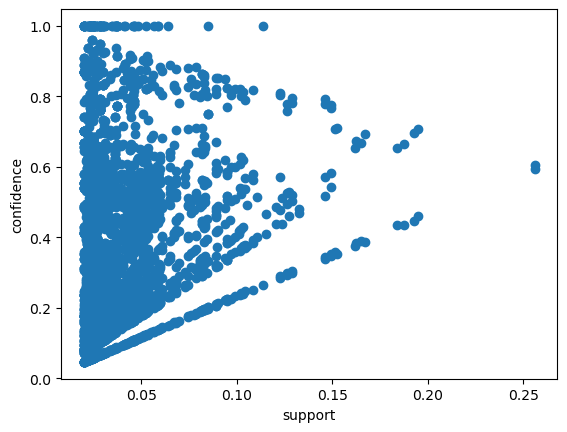

In [7]:
plt.scatter(model1['support'],model1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

Model 2 support=2%, confidence=40%

In [8]:
books2 = apriori(df,min_support=0.02, use_colnames=True)
books2

C:\Users\prati\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(YouthBks, DoItYBks, ArtBks, RefBks, ChildBks,..."
272,0.0270,"(YouthBks, DoItYBks, GeogBks, RefBks, ChildBks..."
273,0.0310,"(YouthBks, ArtBks, DoItYBks, GeogBks, ChildBks..."
274,0.0225,"(YouthBks, ArtBks, GeogBks, RefBks, ChildBks, ..."


In [9]:
model2 = association_rules(books2, metric='lift', min_threshold=0.4)
model2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
3225,(DoItYBks),"(ArtBks, GeogBks, RefBks, ChildBks, CookBks)",0.2820,0.0405,0.024,0.085106,2.101392,0.012579,1.048756,0.729979
3226,(GeogBks),"(ArtBks, DoItYBks, RefBks, ChildBks, CookBks)",0.2760,0.0370,0.024,0.086957,2.350176,0.013788,1.054714,0.793508
3227,(RefBks),"(ArtBks, DoItYBks, GeogBks, ChildBks, CookBks)",0.2145,0.0535,0.024,0.111888,2.091367,0.012524,1.065744,0.664346
3228,(ChildBks),"(ArtBks, DoItYBks, GeogBks, RefBks, CookBks)",0.4230,0.0275,0.024,0.056738,2.063185,0.012368,1.030996,0.893089


In [10]:
model2[model2['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
3225,(DoItYBks),"(ArtBks, GeogBks, RefBks, ChildBks, CookBks)",0.2820,0.0405,0.024,0.085106,2.101392,0.012579,1.048756,0.729979
3226,(GeogBks),"(ArtBks, DoItYBks, RefBks, ChildBks, CookBks)",0.2760,0.0370,0.024,0.086957,2.350176,0.013788,1.054714,0.793508
3227,(RefBks),"(ArtBks, DoItYBks, GeogBks, ChildBks, CookBks)",0.2145,0.0535,0.024,0.111888,2.091367,0.012524,1.065744,0.664346
3228,(ChildBks),"(ArtBks, DoItYBks, GeogBks, RefBks, CookBks)",0.4230,0.0275,0.024,0.056738,2.063185,0.012368,1.030996,0.893089


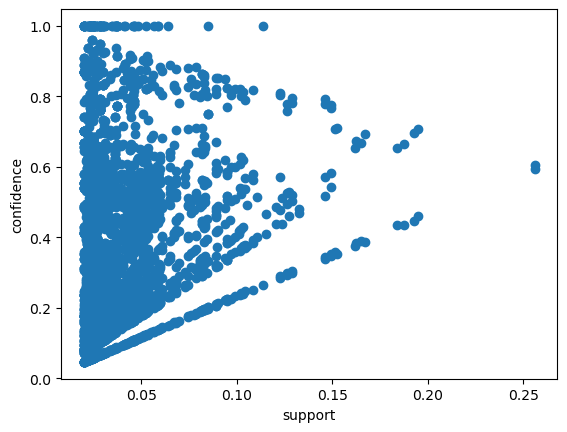

In [11]:
plt.scatter(model2['support'],model2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

Model 3 support=4%, confidence=40%

In [12]:
books3 = apriori(df, min_support=0.04, use_colnames=True)
books3

C:\Users\prati\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
128,0.0440,"(YouthBks, GeogBks, RefBks, ChildBks, CookBks)"
129,0.0465,"(YouthBks, ArtBks, GeogBks, ChildBks, CookBks)"
130,0.0450,"(DoItYBks, GeogBks, RefBks, ChildBks, CookBks)"
131,0.0535,"(ArtBks, DoItYBks, GeogBks, ChildBks, CookBks)"


In [13]:
model3 = association_rules(books3, metric='lift', min_threshold=0.4)
model3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
1061,(ArtBks),"(GeogBks, ChildBks, CookBks, RefBks)",0.2410,0.0785,0.0405,0.168050,2.140762,0.021582,1.107638,0.702077
1062,(GeogBks),"(ChildBks, ArtBks, CookBks, RefBks)",0.2760,0.0610,0.0405,0.146739,2.405560,0.023664,1.100484,0.807039
1063,(RefBks),"(GeogBks, ChildBks, ArtBks, CookBks)",0.2145,0.0835,0.0405,0.188811,2.261212,0.022589,1.129823,0.710069
1064,(ChildBks),"(GeogBks, ArtBks, CookBks, RefBks)",0.4230,0.0460,0.0405,0.095745,2.081406,0.021042,1.055012,0.900443


In [15]:
model3[model3['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
1061,(ArtBks),"(GeogBks, ChildBks, CookBks, RefBks)",0.2410,0.0785,0.0405,0.168050,2.140762,0.021582,1.107638,0.702077
1062,(GeogBks),"(ChildBks, ArtBks, CookBks, RefBks)",0.2760,0.0610,0.0405,0.146739,2.405560,0.023664,1.100484,0.807039
1063,(RefBks),"(GeogBks, ChildBks, ArtBks, CookBks)",0.2145,0.0835,0.0405,0.188811,2.261212,0.022589,1.129823,0.710069
1064,(ChildBks),"(GeogBks, ArtBks, CookBks, RefBks)",0.4230,0.0460,0.0405,0.095745,2.081406,0.021042,1.055012,0.900443


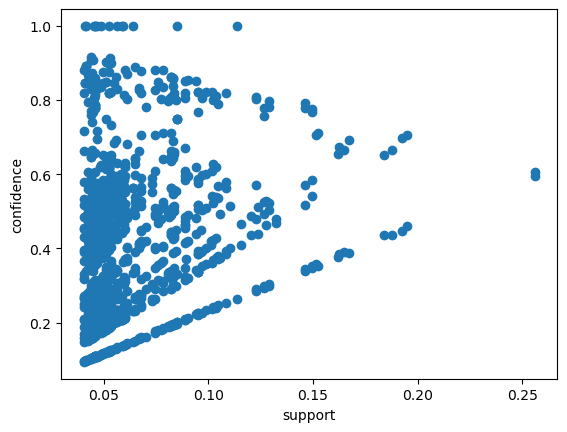

In [16]:
plt.scatter(model3['support'],model3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

# Movies Dataset

In [19]:
df2 = pd.read_csv("D:\\Data Science\\Data Science Assignment\\Association Rules\\my_movies.csv", encoding='latin-1')
df2

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [21]:
df2.drop(columns=['V1', 'V2', 'V3', 'V4', 'V5'], inplace = True)

In [22]:
df2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Model Building

### Model 1 - support = 5%, confidence = 30%

In [24]:
movies1 = apriori(df2, min_support=0.05, use_colnames=True)
movies1

C:\Users\prati\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [25]:
model_1 = association_rules(movies1, metric='lift', min_threshold=0.3)
model_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(LOTR1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(LOTR2),"(LOTR1, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
248,(LOTR1),"(Harry Potter1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [26]:
model_1[model_1['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(LOTR1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(LOTR2),"(LOTR1, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
248,(LOTR1),"(Harry Potter1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


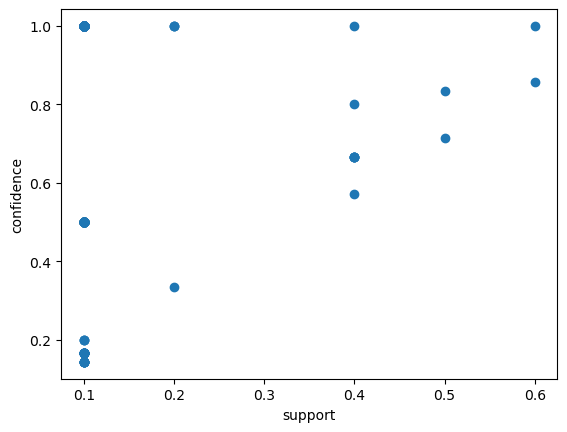

In [27]:
plt.scatter(model_1['support'],model_1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### Model 2 - support = 7%, confidence = 50% 

In [28]:
movies2 = apriori(df2, min_support=0.07, use_colnames=True)
movies2

C:\Users\prati\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [29]:
model_2 = association_rules(movies1, metric='lift', min_threshold=0.5)
model_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(LOTR1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(LOTR2),"(LOTR1, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
248,(LOTR1),"(Harry Potter1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [30]:
model_2[model_2['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(LOTR1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(LOTR2),"(LOTR1, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
248,(LOTR1),"(Harry Potter1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


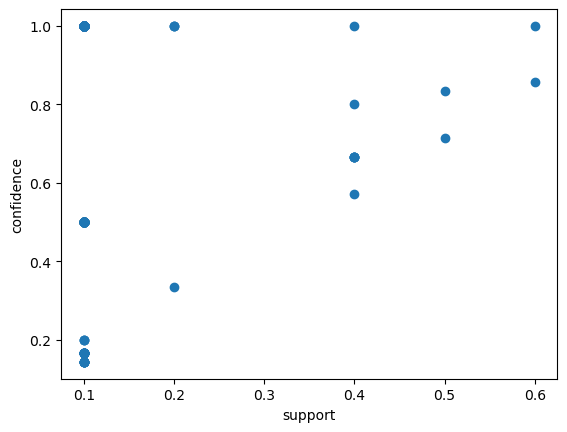

In [31]:
plt.scatter(model_2['support'],model_2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### Model 3 - support = 15%, confidence = 50%

In [32]:
movies3 = apriori(df2, min_support=0.15, use_colnames=True)
movies3

C:\Users\prati\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [33]:
model_3 = association_rules(movies3, metric='lift', min_threshold=0.5)
model_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


In [34]:
model_3[model_3['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


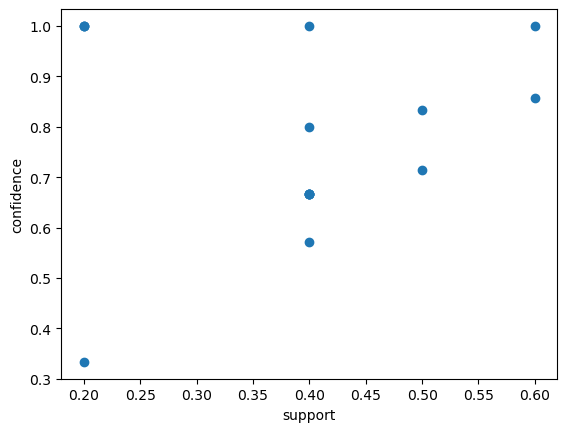

In [35]:
plt.scatter(model_3['support'],model_3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### Model 4 - support = 20%, confidence = 80%

In [36]:
movies4 = apriori(df2, min_support=0.2, use_colnames=True)
movies4

C:\Users\prati\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [37]:
model_4 = association_rules(movies4, metric='lift', min_threshold=0.8)
model_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


In [38]:
model_4[model_4['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


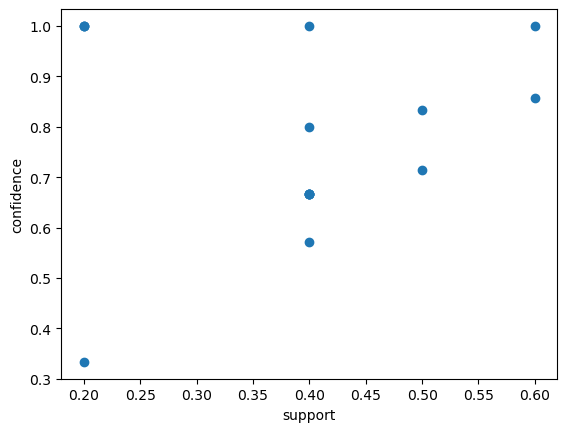

In [39]:
plt.scatter(model_4['support'],model_4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

#### Observations

1) Lower the Confidence level higher the no. of rules and vice-versa.
2) Higher the support, lower the no. of rules.
3) Higher the max length, higher the no. of rules so, we can conclude that these 3 parameters different combinations can generate different rules.




# End 